In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib, random
import networkx as nx
import community

In [2]:
# Load data
df_graph_picked = pd.read_csv('./data/graph_picked.csv')
citations_picked = pd.read_csv('./data/citations_picked.csv')
df_people = pd.read_csv('./data/people.csv')
ugraph_pagerank_picked = pd.read_csv('./data/ugraph_pagerank_picked.csv')
pagerank_picked = pd.read_csv('./data/pagerank_picked.csv')

In [3]:
# Create undirected graph
for row in df_graph_picked.iterrows():
    edge = row[1]
    if edge.p2 < edge.p1:
        df_graph_picked.iloc[row[0]].p2, df_graph_picked.iloc[row[0]].p1 = (
            df_graph_picked.iloc[row[0]].p1, df_graph_picked.iloc[row[0]].p2)       
df_ugraph_picked = df_graph_picked.groupby(['p1', 'p2']).sum().reset_index()

In [4]:
# Random color
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color


# Draw Graph
def draw_graph(ugraph, people, scores, language, node_scale = 1, edge_scale = 1):
    G = nx.Graph()

    for row in ugraph.iterrows():
        edge = row[1]
        G.add_edge(int(edge.p1), int(edge.p2), weight = edge['count'] * edge_scale)

    pos = nx.spring_layout(G, dim = 2)
    edgewidth = []
    for (u,v,d) in G.edges(data=True):
         edgewidth.append(G.get_edge_data(u,v)['weight']/20)
            
    # Community Detection
    partition = community.best_partition(G, resolution=0.8)
    size = float(len(set(partition.values())))
    
    labels = {}
    
    # English/Chinese name
    if language == 'Chinese':
        for j in list(G.nodes):
            labels[j] = people.iloc[j].name_zh
        fontsize = 12
        fontfamily = 'simhei'
    else:
        for j in list(G.nodes):
            labels[j] = people.iloc[j].name_en
        fontsize = 6
        fontfamily = None
    
    # Plot
    plt.figure(figsize=(20,20))
    count = 0
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys()
                                    if partition[nodes] == com]
        # Node sizes propotional to the citations
        nodesizes = [scores[scores.name == j].score.values[0]*node_scale for j in list_nodes]
        # Draw
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = nodesizes,
                                    node_color = randomcolor())


    nx.draw_networkx_edges(G, pos, width=edgewidth) 
    nx.draw_networkx_labels(G, pos, labels, font_size=fontsize, font_family = fontfamily)
    plt.show()

/home/hengji/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


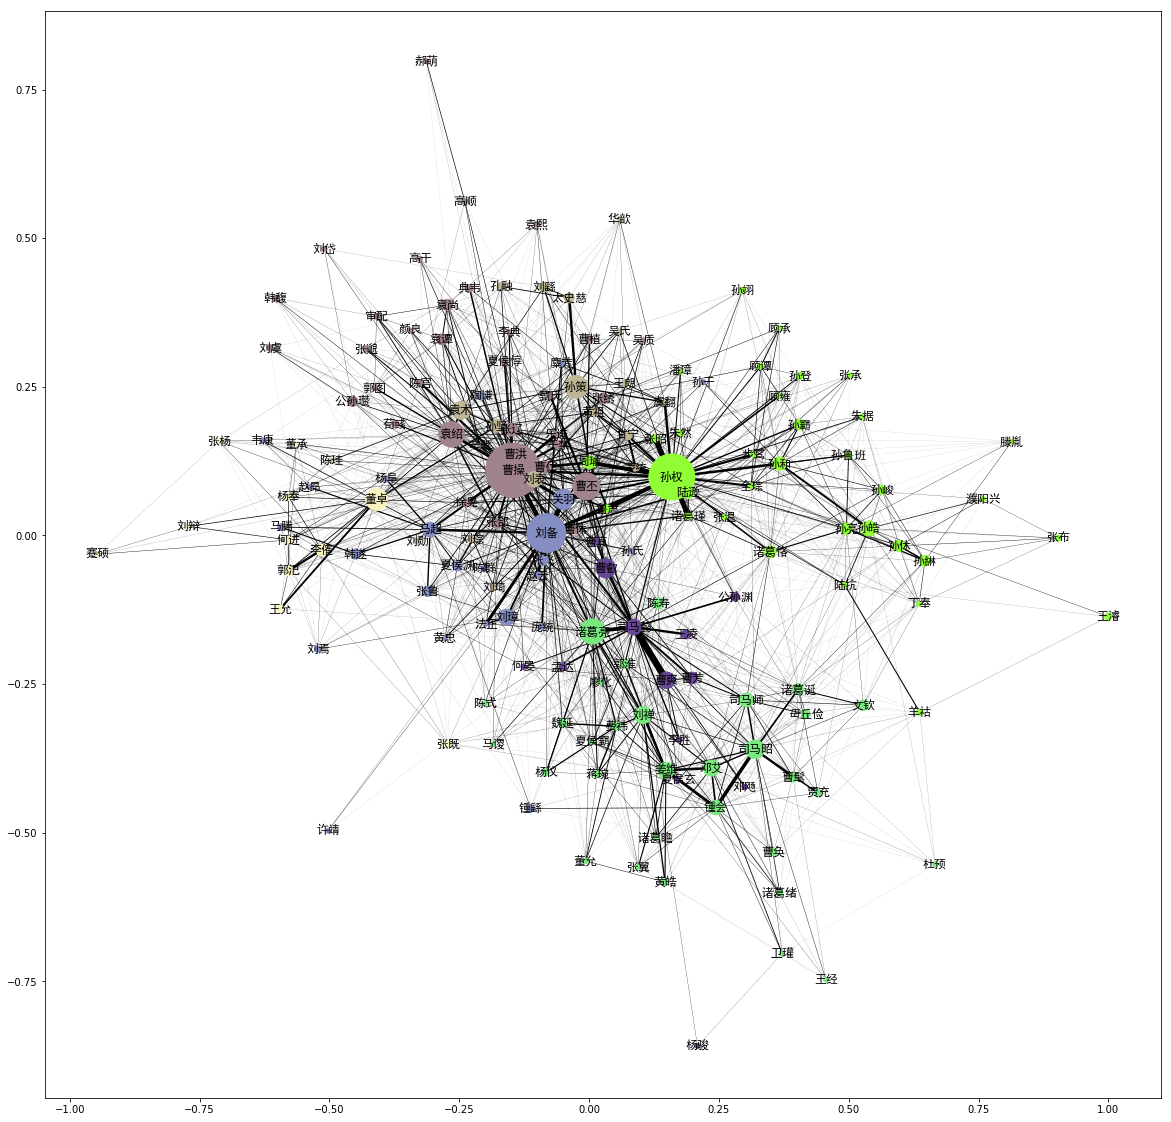

In [5]:
draw_graph(df_ugraph_picked, df_people, citations_picked, 'Chinese')

/home/hengji/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


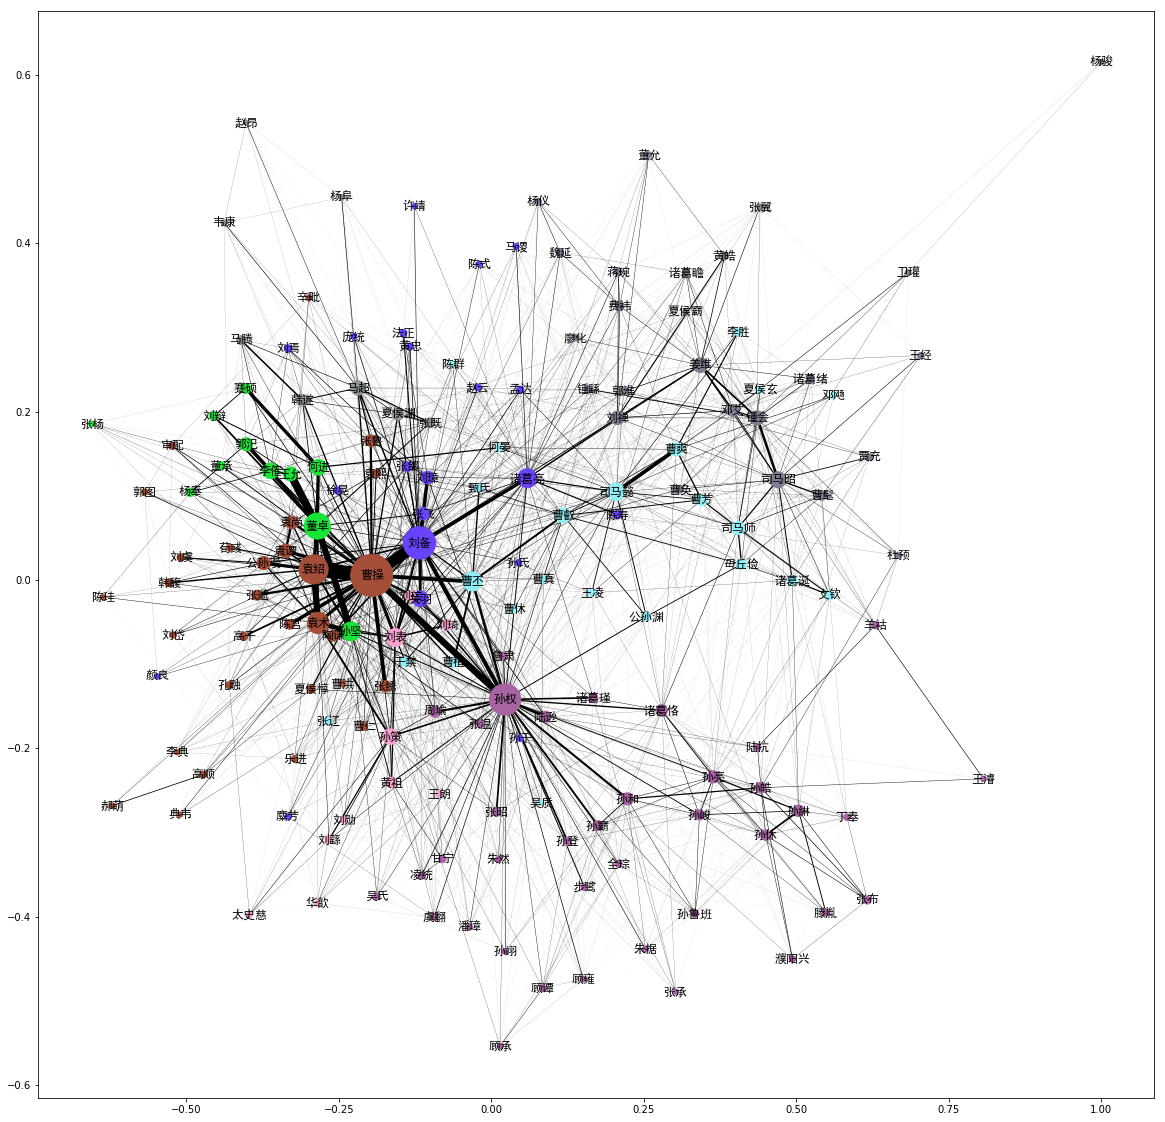

In [17]:
draw_graph(ugraph_pagerank_picked, df_people, pagerank_picked, 'Chinese', node_scale = 20000, edge_scale = 10000)